In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('Case_study_CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Task
- Sử dụng pandas để đọc dữ liệu
- Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu
- Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu
- Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
- Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
- Nhận xét các thuộc tính gây ảnh hưởng tới giá
- Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)
- Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu
- Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất.
- Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.
- Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS
- Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

## 1. Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Các thuộc tính trong bộ dữ liệu:
- car_ID : Mã xe -> thuộc tính dạng định danh Nominal và nó Unique nên sẽ không dùng trong quá trình phân tích và chọn đặc trưng để dự đoán nhiều.
- symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro) -> thuộc tính Ordinal.
- carName: Tên xe -> thuộc tính định danh Nominal
- fueltype: Loại nhiên liệu -> thuộc tính định danh Nominal
- aspiration: loại hút (turbo hoặc std) -> thuộc tính định danh Nominal
- doornumber: Số lượng cửa -> thuộc tính định danh Nominal
- carbody: Loại thân xe (sedan, wagon, hatchback) -> thuộc tính định danh Nominal
- drivewheel: Loại bánh xe -> thuộc tính định danh Nominal
- enginelocation: Vị trí động cơ -> thuộc tính định danh Nominal
- wheelbase: Chiều dài cơ sở -> thuộc tính định lượng Continous
- carlength: Chiều dài xe -> thuộc tính định lượng Continous
- carwidth: Chiều rộng xe -> thuộc tính định lượng Continous
- carheight: Chiều cao xe -> thuộc tính định lượng Continous
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý -> thuộc tính định lượng Discrete
- enginetype: Loại động cơ -> thuộc tính định danh Nominal
- cylindernumber: Số lượng xi lanh đặt trong xe -> thuộc tính định danh Nominal
- enginesize: Kích thước động cơ -> thuộc tính định lượng Discrete
- fuelsystem: Hệ thống nhiên liệu của xe ô tô -> thuộc tính định danh Nominal
- boreratio: Tỉ số hành trình -> thuộc tính định lượng Continous
- stroke: số kỳ hoăc kích thước bên trong động cơ -> thuộc tính định lượng Continous
- compressionratio: Tỉ số nén của ôtô -> thuộc tính định lượng Continous
- horsepower: Mã lực -> thuộc tính định lượng Discrete
- peakrpm: Tốc độ động cơ cao nhất -> thuộc tính định lượng Discrete
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố -> thuộc tính định lượng Discrete
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc -> thuộc tính định lượng Discrete
- price: Giá xe -> thuộc tính định lượng Discrete, `Output của mô hình`

## 2. Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [4]:
def get_brand(s):
    return s.str.split().str[0]
data['brand'] = get_brand(data['CarName'])
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [5]:
data['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
data['brand'] = data['brand'].replace('maxda', 'mazda')
data['brand'] = data['brand'].replace('Nissan', 'nissan')
data['brand'] = data['brand'].replace('porcshce', 'porsche')
data['brand'] = data['brand'].replace('toyouta', 'toyota')
data['brand'] = data['brand'].replace(['vw','vokswagen'], 'volkswagen')

In [7]:
data['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## 3. Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
data.duplicated().sum()

0

### Nhận xét
- Check NULL value: không có
- Check dữ liệu trùng: không có
- Các thuộc tính định lượng: car_ID, symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price.
- Các thuộc tính định tính: 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand'

## 4. Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định

### Phân tích với thuộc tính định tính

In [10]:
def cat_price(data, cat_col):
    print(data[cat_col].value_counts())
    print(data[cat_col].value_counts(normalize=True))
    gr_data = data[[cat_col,'price']].groupby(cat_col)['price'].mean().sort_values(ascending=False)
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,15))
    sns.barplot(x=cat_col, y="price", data=data, order=gr_data.index, ax=ax1)
    sns.scatterplot(data=data, x=cat_col, y='price', ax=ax2)
    sns.boxplot(data=data, x=cat_col, y='price', ax=ax3)
    plt.tight_layout()
    
def ttest_ind(data, cat_col):
    unique = data[cat_col].unique()
    variable_1 = data.groupby(cat_col)['price'].get_group(unique[0])
    variable_2 = data.groupby(cat_col)['price'].get_group(unique[1])
    t, pvalue = stats.ttest_ind(variable_1, variable_2, equal_var=True)
    print(f"p_value: {pvalue}")
    
def test_anova(data, cat_col):
    mod = ols(f"price ~ {cat_col}", data=data).fit()
    table = sm.stats.anova_lm(mod, typ=2)
    print(table)

In [11]:
data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand
count,205,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8,22
top,toyota corolla,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,6,185,168,115,96,120,202,148,159,94,32


gas       185
diesel     20
Name: fueltype, dtype: int64
gas       0.902439
diesel    0.097561
Name: fueltype, dtype: float64


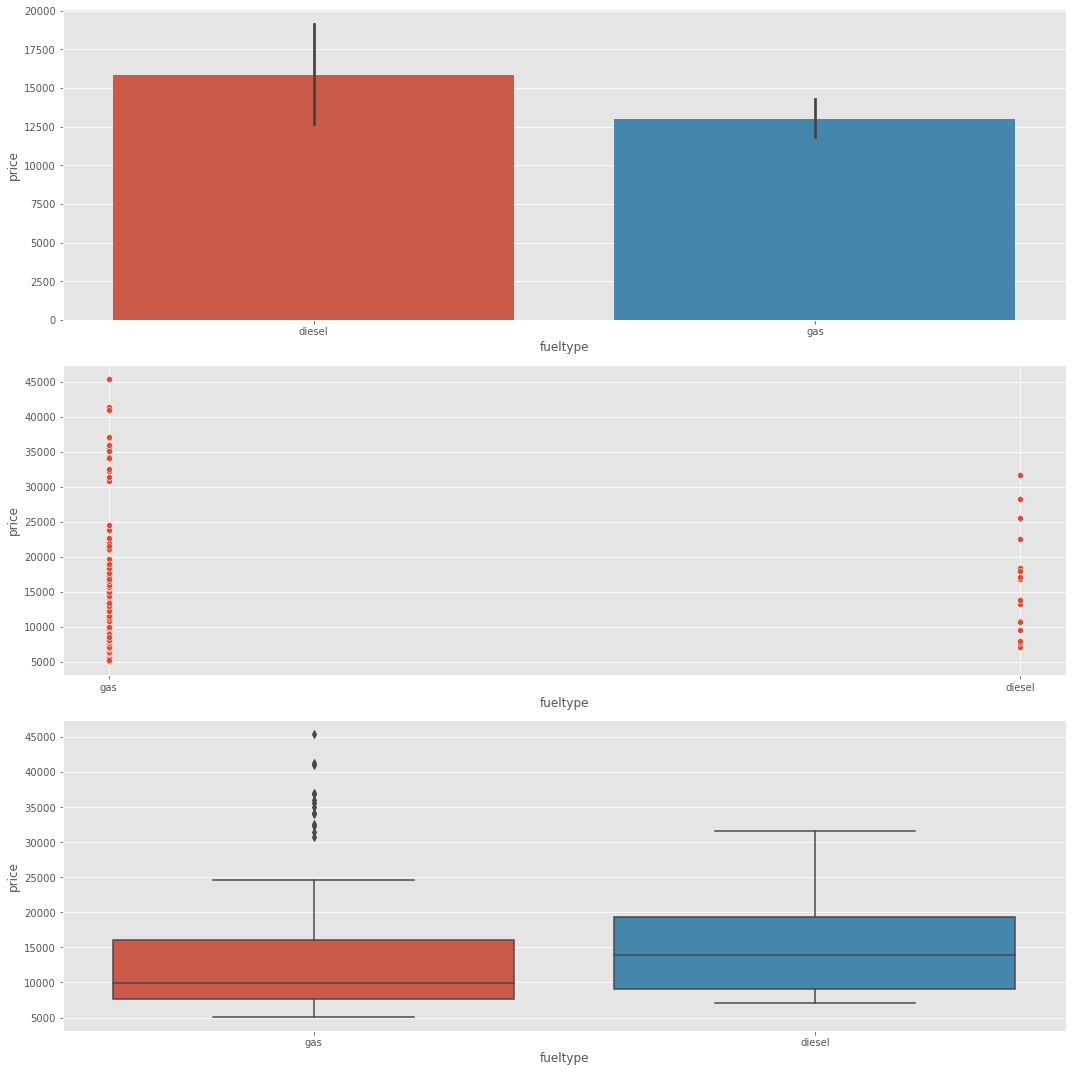

In [12]:
cat_price(data, 'fueltype')

In [13]:
ttest_ind(data, 'fueltype')

p_value: 0.13153563336537977


Người dân sử dụng xe chạy bằng gas nhiều chiếm hơn 90% bộ dữ liệu, do giá trung bình để mua một chiếc chạy bằng dầu diesel lại mắc hơn xe chạy bằng gas. Trung bình một chiếc xe chạy bằng dầu diesel có giá 15838, lớn hơn 2838 so với giá trung bình của một chiếc xe chạy bằng gas.

Theo kiểm định T-test giữa hai biến, Không có sự khác biệt giữa hai giá trị trung bình về giá của hai biến.

-> Nó có ảnh hưởng đến giá, nhưng để chọn vào mô hình thì không tốt để dự đoán

std      168
turbo     37
Name: aspiration, dtype: int64
std      0.819512
turbo    0.180488
Name: aspiration, dtype: float64


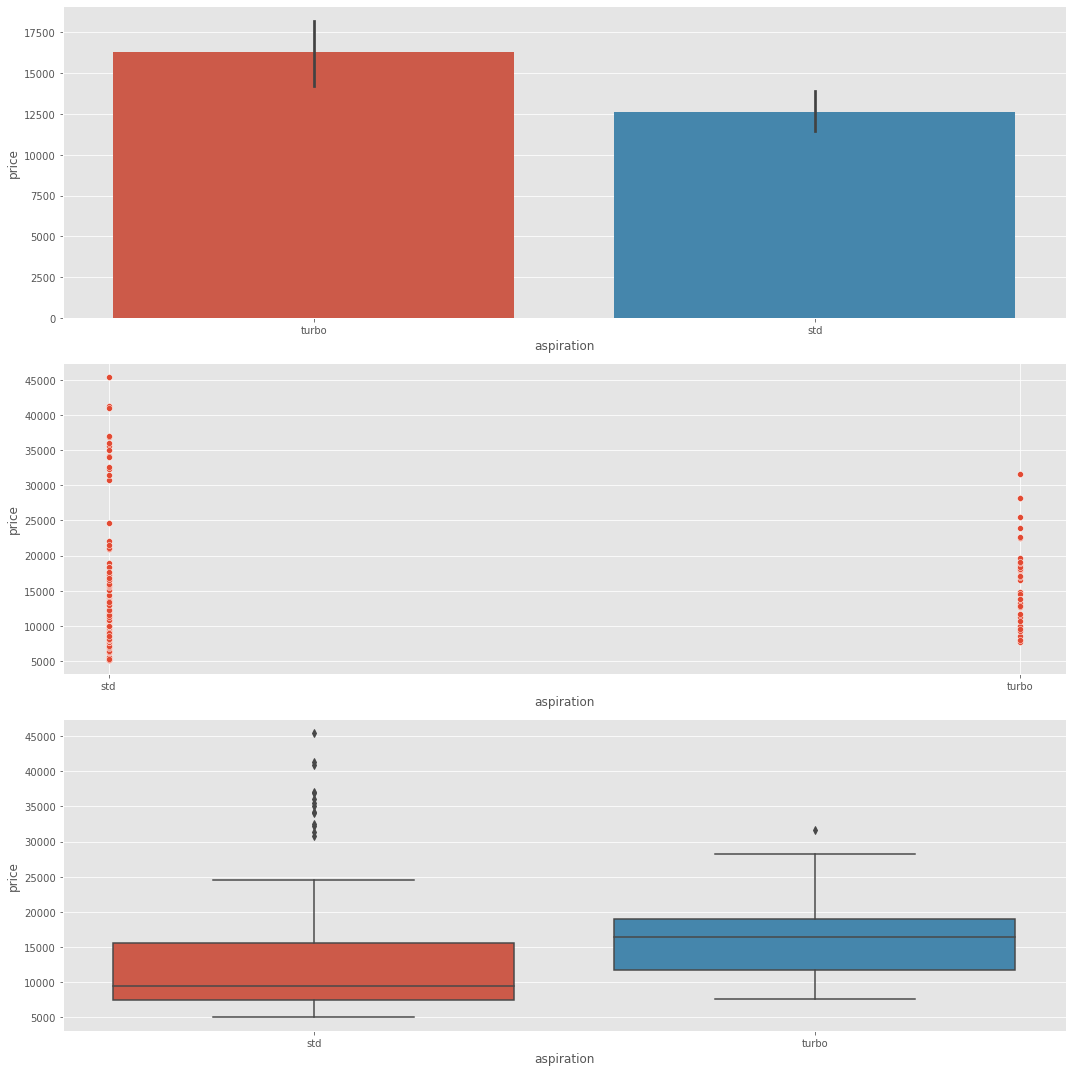

In [14]:
cat_price(data, 'aspiration')

In [15]:
ttest_ind(data, 'aspiration')

p_value: 0.01070030083318341


Cũng như đặc tính nhiên liệu, Xe chạy bằng động cơ tiêu chuẩn được sử dụng nhiều do giá bán thấp. Động cơ turbo mạnh hơn nên có giá cao hơn các xe chạy bằng động cơ tiêu chuẩn.

Theo kiểm định T-test giữa hai biến, có sự khác biệt giữa hai giá trị trung bình về giá của hai biến.

-> Ảnh hưởng đến giá, và có thể đưa vào mô hình để dự đoán

four    115
two      90
Name: doornumber, dtype: int64
four    0.560976
two     0.439024
Name: doornumber, dtype: float64


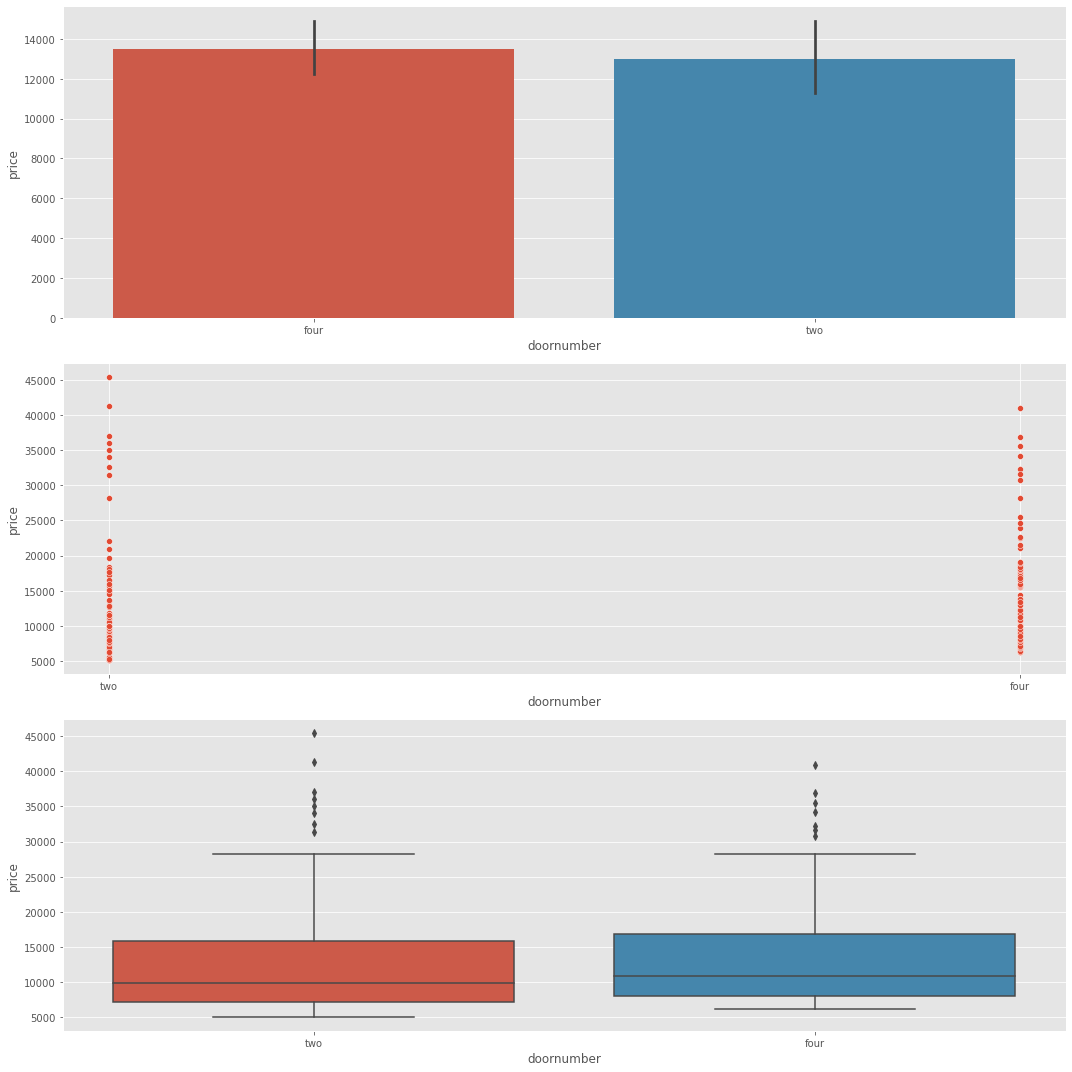

In [16]:
cat_price(data, 'doornumber')

In [17]:
ttest_ind(data, 'doornumber')

p_value: 0.6504483953299085


Không có sự khác biệt quá lớn giữa xe hai cửa và xe bốn cửa.

Theo kiểm định T-test giữa hai biến, không có sự khác biệt giữa hai giá trị trung bình về giá của hai biến.

-> Không ảnh hưởng đến giá, và không thể đưa vào mô hình để dự đoán

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: carbody, dtype: float64


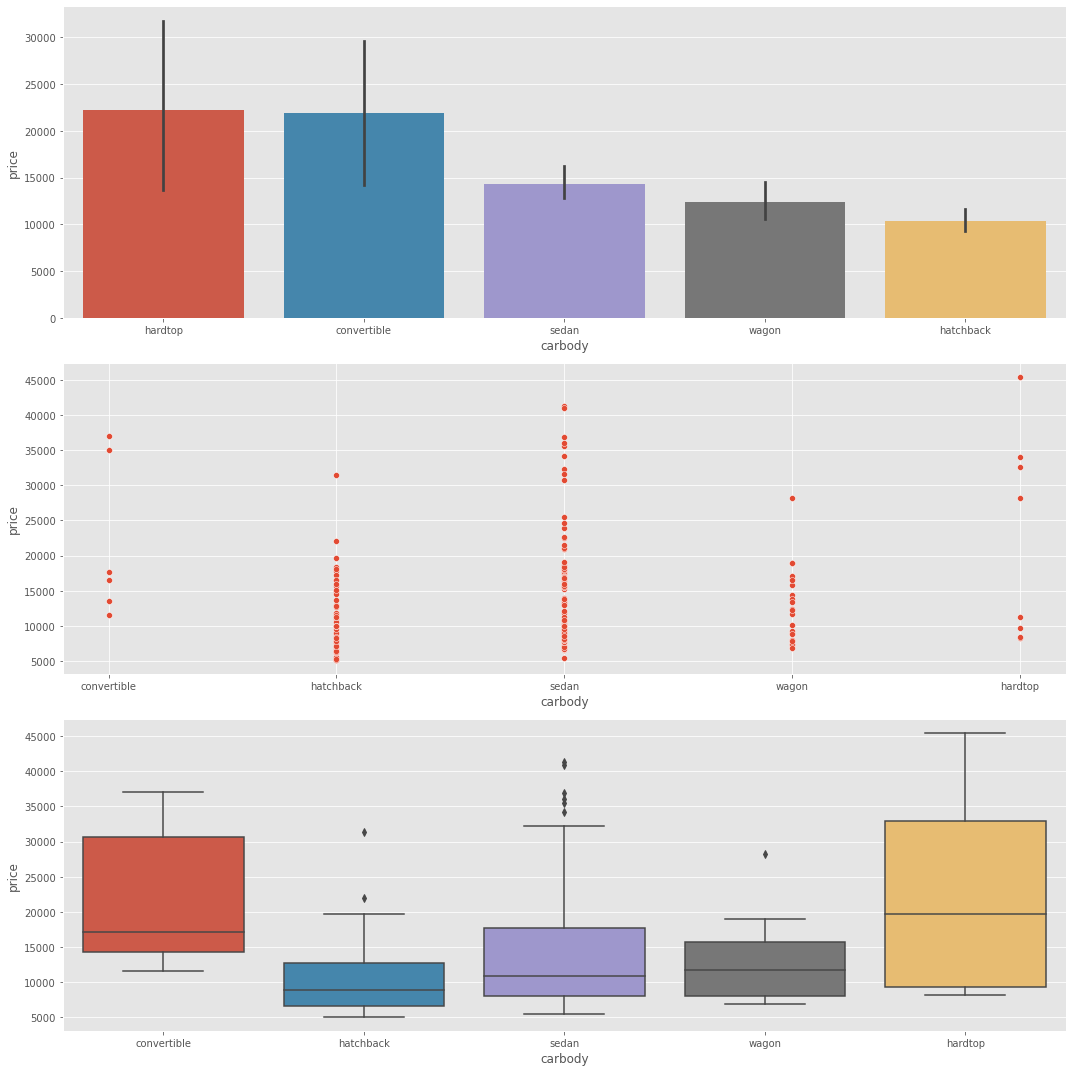

In [18]:
cat_price(data, 'carbody')

In [19]:
test_anova(data, 'carbody')

                sum_sq     df         F    PR(>F)
carbody   1.801997e+09    4.0  8.031976  0.000005
Residual  1.121764e+10  200.0       NaN       NaN


Dòng xe Sedan và Hatchback được bán nhiều nhất, chiếm lần lượt 47% và 34% trong bộ dữ liệu. Nhưng Convertible và Hardtop có giá trung bình bán ra cao hơn hai loại xe trên.

Hãng xe Porche, dòng Convertible hai cửa có giá bán trung bình cao nhất trong bộ dữ liệu. Tiếp đến là Hãng Buick, dòng xe Hardtop hai cửa.

Theo kiểm định ANOVA của carbody, có sự khác biệt giữa các giá trị trung bình về giá.

-> Có ảnh hưởng đến giá, và có thể đưa vào mô hình để dự đoán

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: drivewheel, dtype: float64


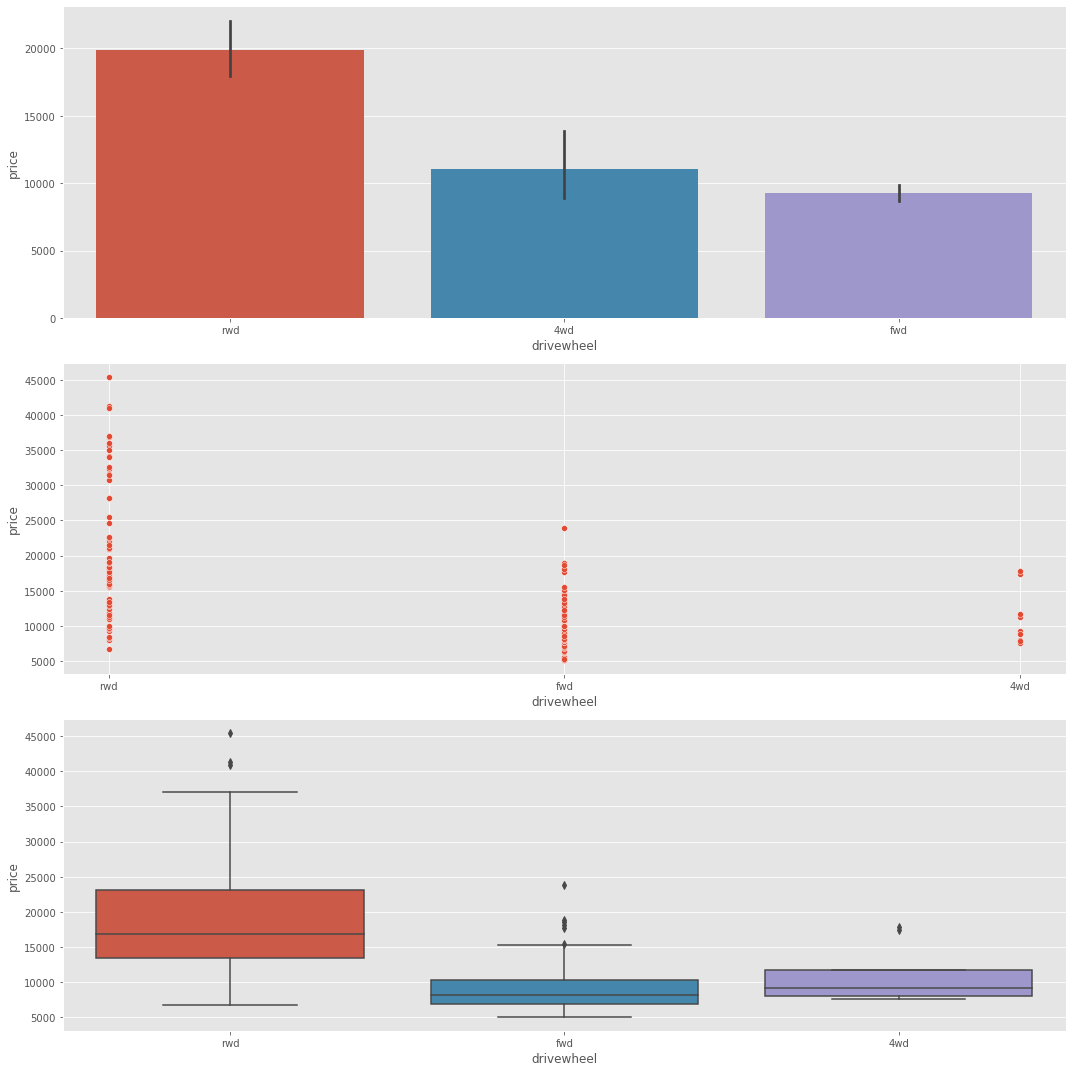

In [20]:
cat_price(data, 'drivewheel')

In [21]:
test_anova(data, 'drivewheel')

                  sum_sq     df          F        PR(>F)
drivewheel  5.344065e+09    2.0  70.320553  6.632887e-24
Residual    7.675574e+09  202.0        NaN           NaN


Hầu hết các xe sẽ sử dụng fwd (front wheel drive) vì nó tiết kiệm nhiên liệu hơn và thải ít khí cacbon dioxide hơn, nó có thể chạy tốt trong thời tiết có tuyết hơn rwd (rear wheel drive). rwd có giá trung bình cao hơn fwd và 4wd vì nó thường được gắn vào các xe thể thao và đem lại trải nghiệm lái hơn cho người lái.

Theo kiểm định ANOVA, có sự khác biệt giữa các giá trị trung bình về giá.

-> Có ảnh hưởng đến giá, và có thể đưa vào mô hình để dự đoán

front    202
rear       3
Name: enginelocation, dtype: int64
front    0.985366
rear     0.014634
Name: enginelocation, dtype: float64


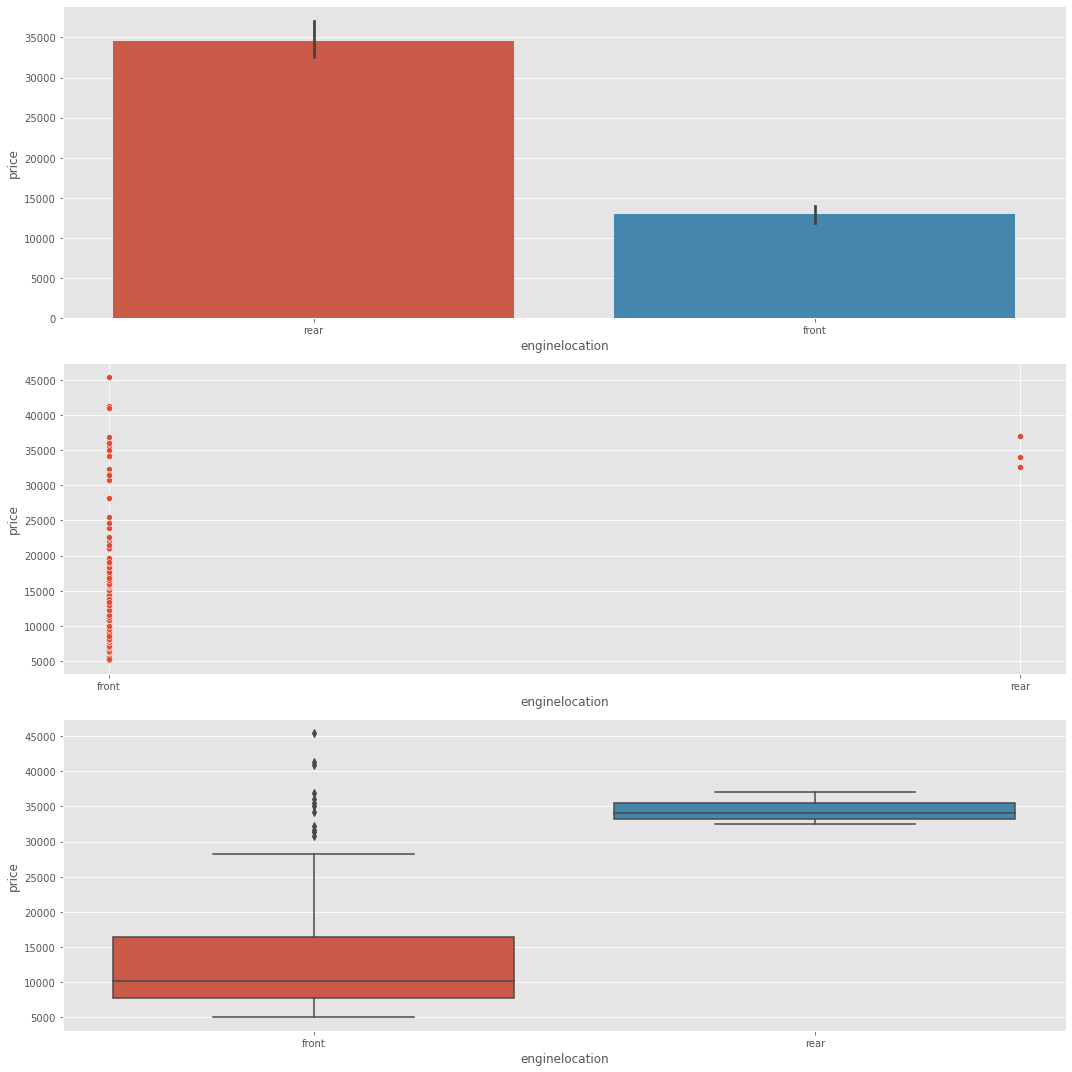

In [22]:
cat_price(data, 'enginelocation')

In [23]:
ttest_ind(data, 'enginelocation')

p_value: 1.9930196390573916e-06


Như ta thấy ở trên, fwd được dùng nhiều nhất nên hầu hết xe sẽ đặt động cơ tại phía trước (front). Nhưng giá bán thì các xe có động cơ đặt sau (rear) cao hơn.

Theo kiểm định T-test giữa hai biến, có sự khác biệt giữa hai giá trị trung bình về giá của hai biến.

-> Có ảnh hưởng đến giá, và không thể đưa vào mô hình để dự đoán do tỷ trọng front quá lớn

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
ohc      0.721951
ohcf     0.073171
ohcv     0.063415
l        0.058537
dohc     0.058537
rotor    0.019512
dohcv    0.004878
Name: enginetype, dtype: float64


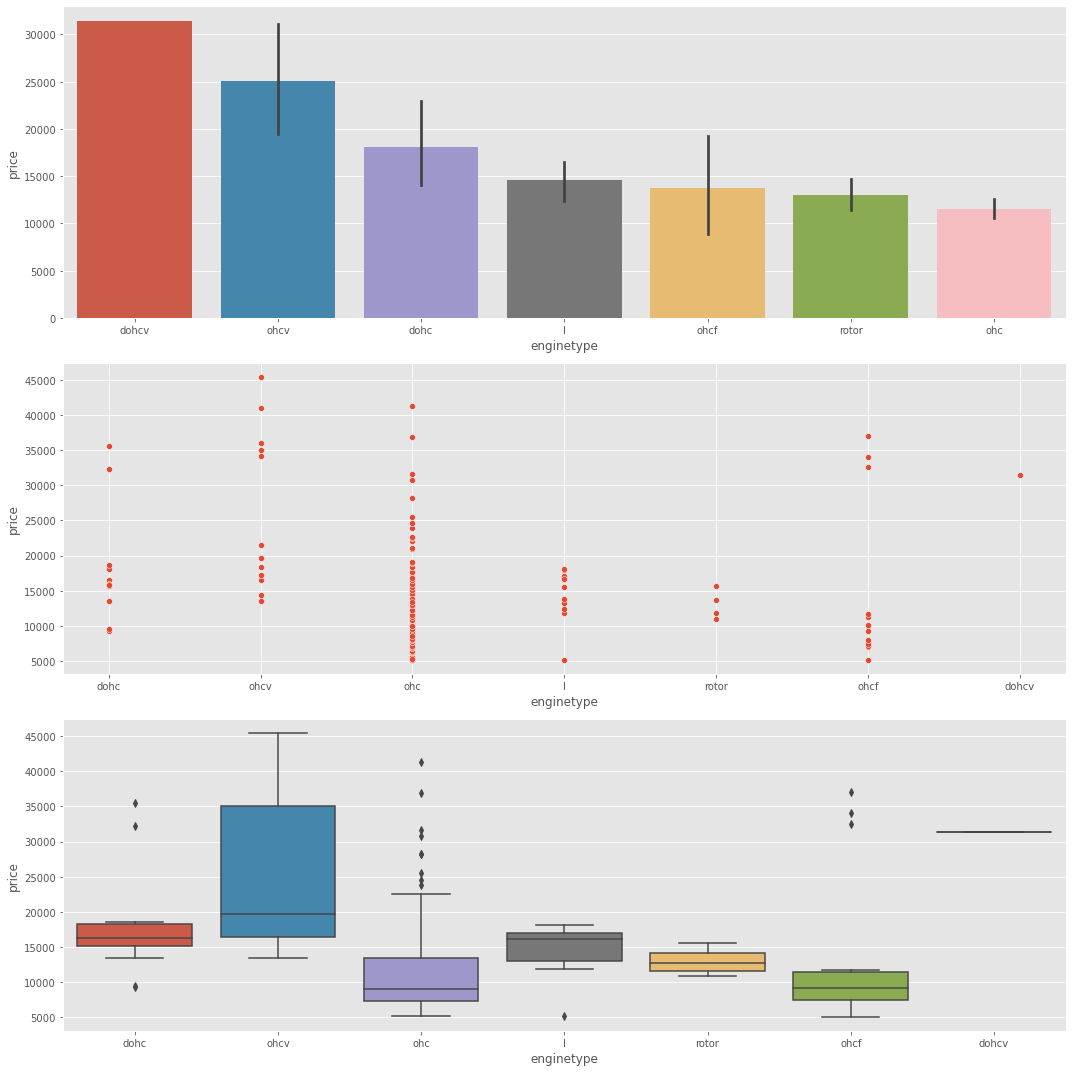

In [24]:
cat_price(data, 'enginetype')

In [25]:
test_anova(data, 'enginetype')

                  sum_sq     df        F        PR(>F)
enginetype  2.880743e+09    6.0  9.37622  4.692665e-09
Residual    1.013890e+10  198.0      NaN           NaN


ohc chiếm tỷ trọng cao trong số lượng loại động cơ. Do đó ta thấy ohc có giá trung bình thấp nhất

Theo kiểm định ANOVA, có sự khác biệt giữa các giá trị trung bình về giá.

-> Có ảnh hưởng đến giá, và có thể đưa vào mô hình để dự đoán

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
four      0.775610
six       0.117073
five      0.053659
eight     0.024390
two       0.019512
three     0.004878
twelve    0.004878
Name: cylindernumber, dtype: float64


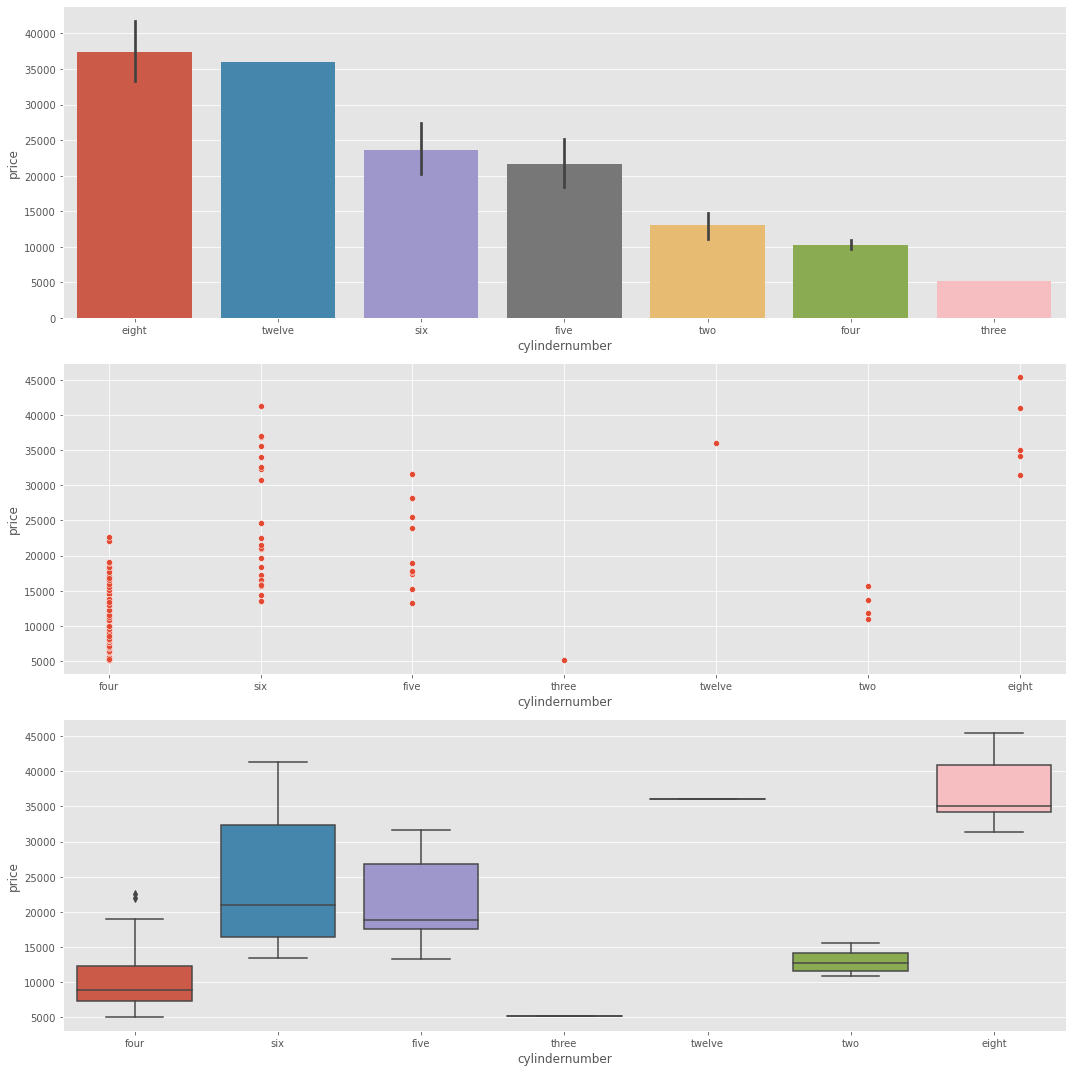

In [26]:
cat_price(data, 'cylindernumber')

In [27]:
test_anova(data, 'cylindernumber')

                      sum_sq     df          F        PR(>F)
cylindernumber  8.275757e+09    6.0  57.568881  8.065780e-41
Residual        4.743882e+09  198.0        NaN           NaN


Ta thấy giá trung bình cao khi có số lượng xi lanh đặt trong động cơ cao, nhưng số lượng các xe lại không nhiều. Chủ yếu là 4 xi lanh đặt trong xe.

Theo kiểm định ANOVA, có sự khác biệt giữa các giá trị trung bình về giá.

-> Có ảnh hưởng đến giá, và có thể đưa vào mô hình để dự đoán

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
mpfi    0.458537
2bbl    0.321951
idi     0.097561
1bbl    0.053659
spdi    0.043902
4bbl    0.014634
spfi    0.004878
mfi     0.004878
Name: fuelsystem, dtype: float64


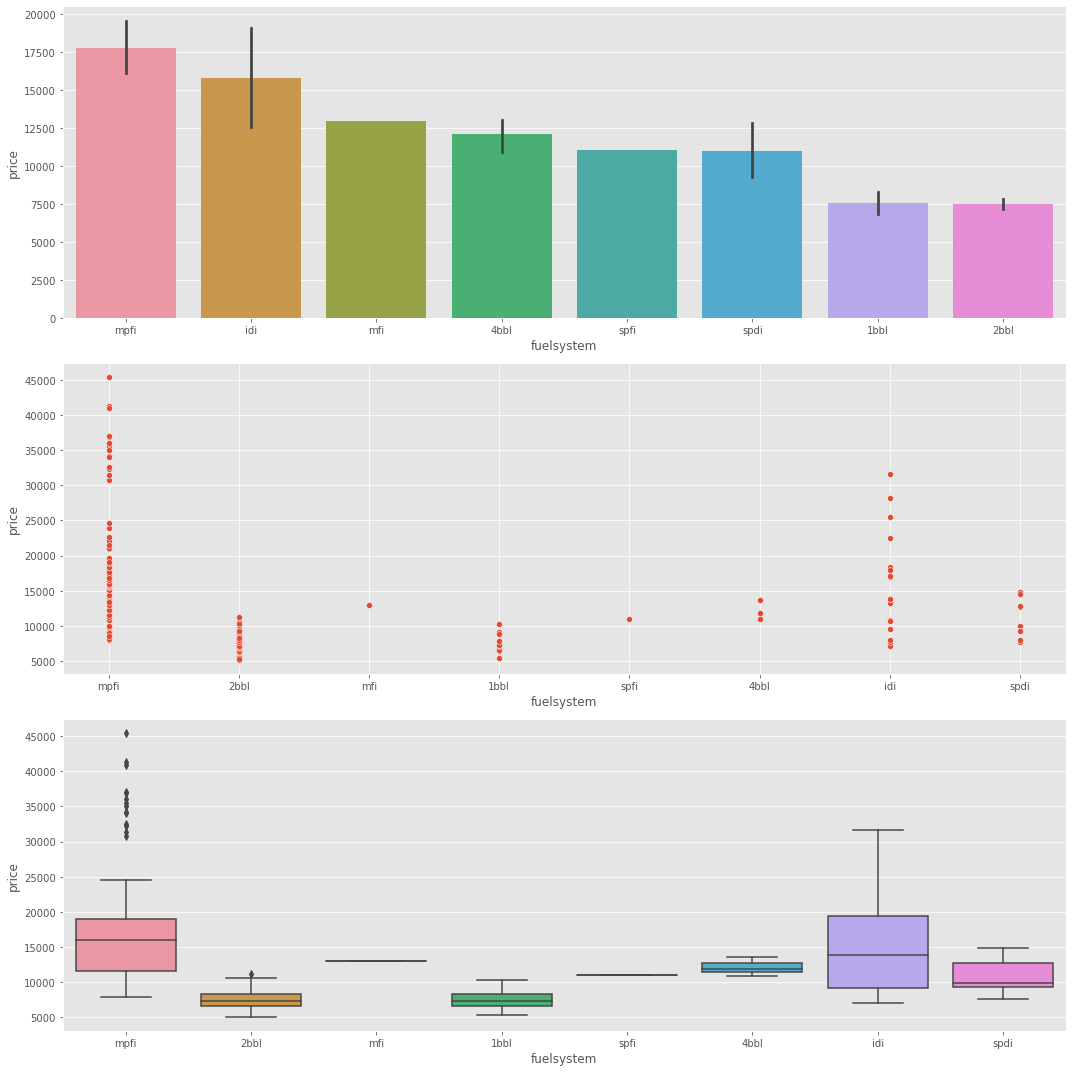

In [28]:
cat_price(data, 'fuelsystem')

In [29]:
test_anova(data, 'fuelsystem')

                  sum_sq     df          F        PR(>F)
fuelsystem  4.651199e+09    7.0  15.641865  2.990386e-16
Residual    8.368441e+09  197.0        NaN           NaN


mpfi có số lượng cao, giá trung bình cao nhất trong các loại hệ thống nhiên liệu của xe. Sau đó đến 2bbl nhưng so với mpfi thì giá trung bình thấp nhất.

Theo kiểm định ANOVA, có sự khác biệt giữa các giá trị trung bình về giá.

-> Có ảnh hưởng đến giá, và có thể đưa vào mô hình để dự đoán

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64
toyota         0.156098
nissan         0.087805
mazda          0.082927
mitsubishi     0.063415
honda          0.063415
volkswagen     0.058537
subaru         0.058537
volvo          0.053659
peugeot        0.053659
dodge          0.043902
buick          0.039024
bmw            0.039024
audi           0.034146
plymouth       0.034146
saab           0.029268
porsche        0.024390
isuzu          0.019512
chevrolet      0.014634
jaguar         0.014634
alfa-romero    0.014634
renault        0.009756
mercury        0.004878
Name: brand, dtype: float64


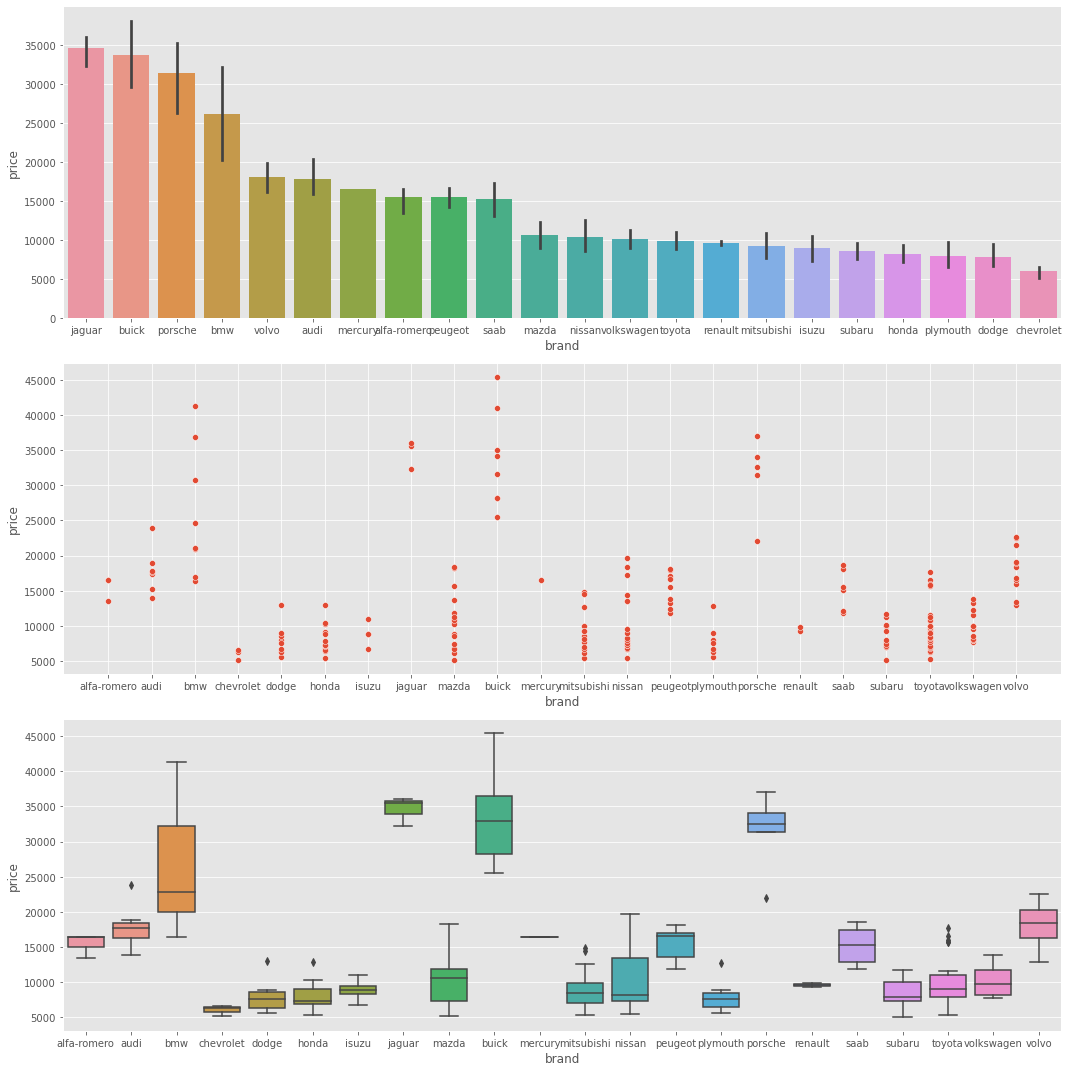

In [30]:
cat_price(data, 'brand')

In [31]:
test_anova(data, 'brand')

                sum_sq     df          F        PR(>F)
brand     1.044119e+10   21.0  35.287603  3.646260e-53
Residual  2.578454e+09  183.0        NaN           NaN


Toyota là hãng xe được bán nhiều nhất. Buick, Jaguar, Porche, BMW là các hãng xe có giá cao, mặc dù chiếm tỷ trọng nhỏ trong bộ dữ liệu, vì các hãng xe này mang thương hiệu sang trọng trong các hãng xe.

Theo kiểm định, có sự khác biệt giữa các giá trị trung bình về giá

-> Có ảnh hưởng đến giá, không đem vào mô hình vì tên thương hiệu mang đặc trưng riêng

### Kết luận:
#### Các thuộc tính định tính ảnh hưởng tới giá:
- fueltype
- aspiration
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- fuelsystem
- brand

### Phân tích thuộc tính định lượng¶

In [32]:
def num_price(data, num_col):
    print(data[num_col].describe())
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(data=data, x=num_col, ax=ax1)
    sns.histplot(data=data, x=num_col, kde=True, color='r', ax=ax2)
    sns.lmplot(data=data, x=num_col, y='price')
    coef, p_value = stats.pearsonr(data[num_col], data['price'])
    print(f"{num_col} - Price has p value: {p_value}")

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64
symboling - Price has p value: 0.25431175848636967


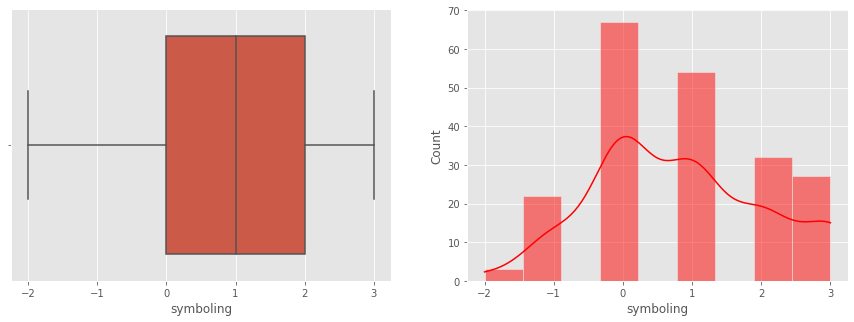

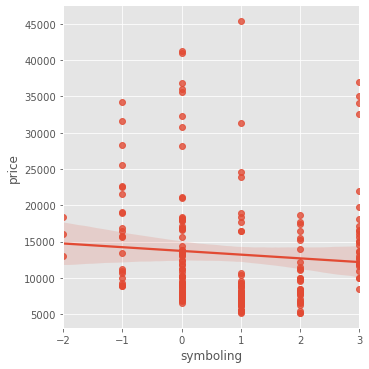

In [33]:
num_price(data, 'symboling')

Hầu hết các xe có mức độ an toàn từ 0 đến 2, có nghĩa là các xe có mức độ an toàn từ trung bình đến nguy hiểm. Trong đó giá xe cao nhất là ở mức độ 1, hơn 45000.

Theo Kiểm định thì Symboling và Price không mối quan hệ với nhau. Nên không ảnh hưởng đến giá.

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64
wheelbase - Price has p value: 1.1828204863378005e-19


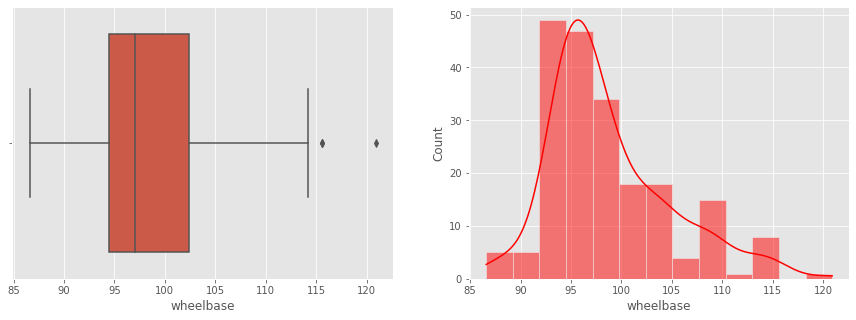

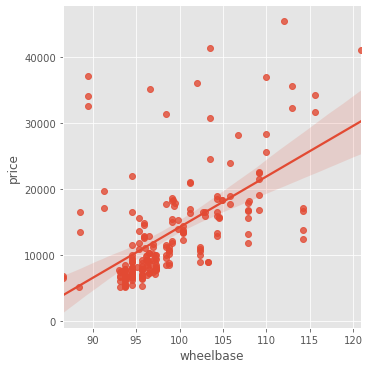

In [34]:
num_price(data, 'wheelbase')

Chiều dài của xe trung bình trong khoảng từ 94 đến 102, có xu hướng lệch phải. Chiều dài càng tăng thì giá càng tăng.

Theo Kiểm định, wheelbase và price có mối quan hệ tương quan với nhau. Nên sẽ ảnh hưởng đến giá.

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64
carlength - Price has p value: 1.6787066240746602e-29


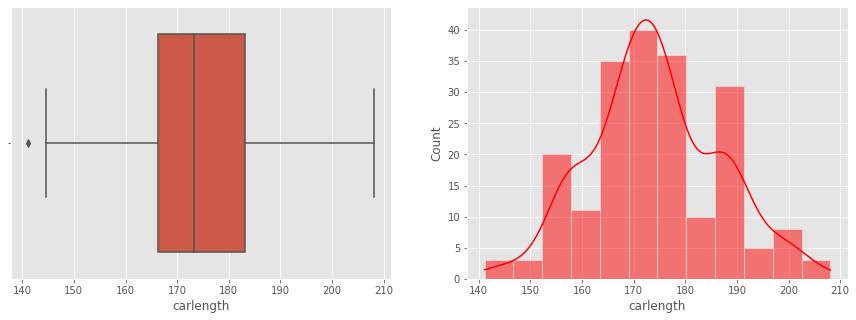

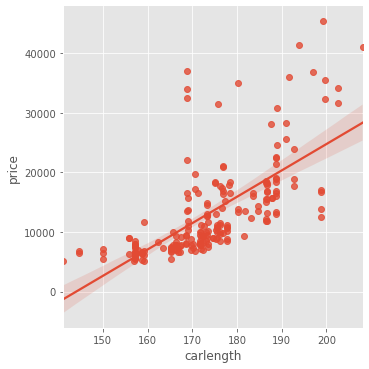

In [35]:
num_price(data, 'carlength')

Chiều dài xe trung bình là 174, hầu hết xe có kích thước chiều dài nằm trong khoảng từ 166 đến 183. Có một chiếc có chiều dài thấp nhất là 141 (outlier). Phân phối của carlength có dạng phân phối chuẩn. Ta thấy chiều dài xe tăng thì giá tiền cũng sẽ tăng.

Theo Kiểm định, carlength và price có mối quan hệ tương quan với nhau. Nên sẽ ảnh hưởng đến giá.

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64
carwidth - Price has p value: 9.627437876120389e-40


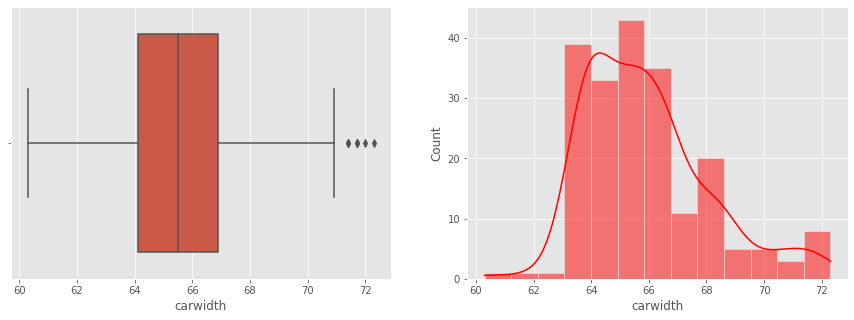

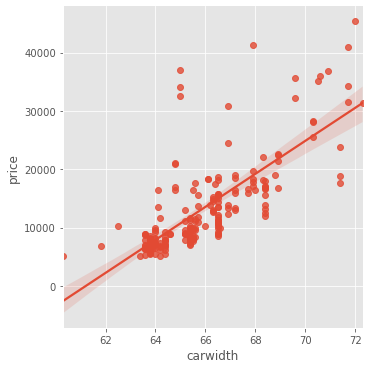

In [36]:
num_price(data, 'carwidth')

Chiều rộng trung bình của các xe là 65, hầu hết có chiều rộng nằm trong khoảng từ 64 đến 66. Có một số xe vượt hơn 71 (outlier). Phân phối có xu hướng lệch phải. Chiều rộng xe tăng thì giá xe cũng tăng.

Theo kiểm định, carwidth và price có mối quan hệ tương quan với nhau. Nên sẽ ảnh hưởng đến giá.

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64
carheight - Price has p value: 0.08832832352275669


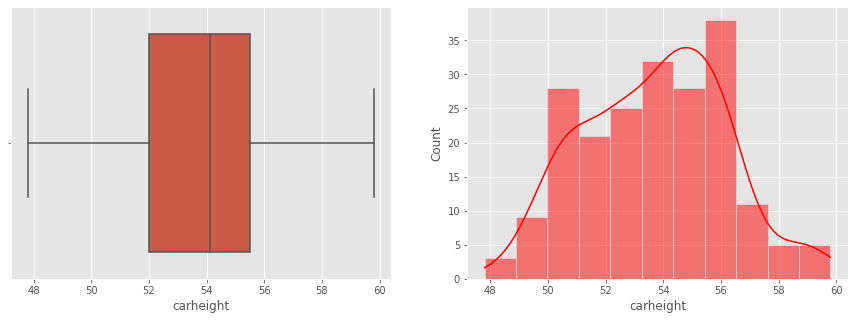

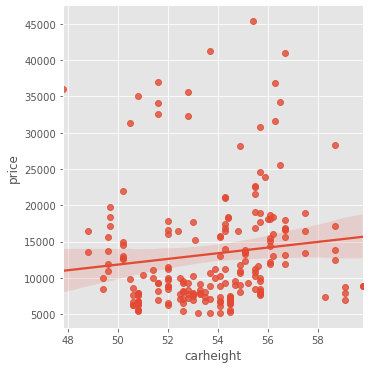

In [37]:
num_price(data, 'carheight')

Chiều cao của xe có giá trị trung bình là 53, nằm trong khoảng từ 52 đến 55 là chủ yếu, phân phối có xu hướng lệch trái. chiều cao xe và giá phân tán đều, trải rộng.

Theo kiểm định, carheight và price không có mối quan hệ tương quan với nhau. Nên sẽ không ảnh hưởng đến giá.

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64
curbweight - Price has p value: 1.2144448264033587e-54


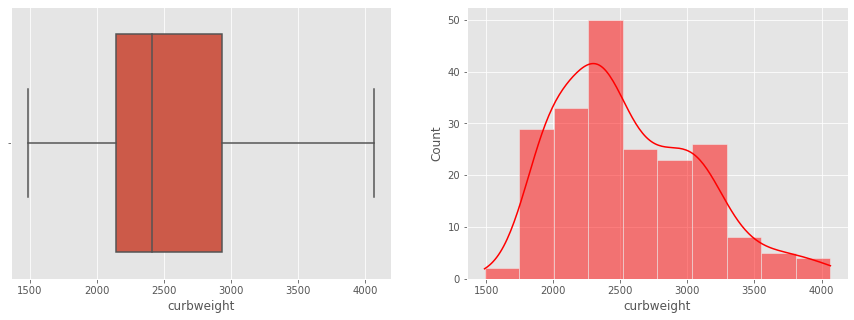

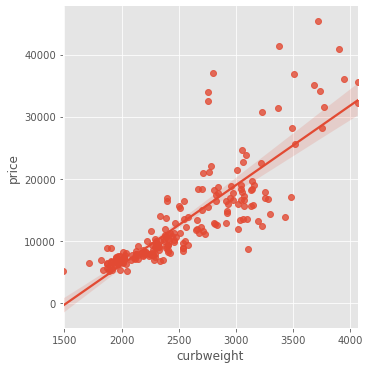

In [38]:
num_price(data, 'curbweight')

Trọng lượng trung bình của các xe là 2555, hầu hết nằm trong khoảng từ 1488 đến 2935, có xu hướng lệch phải. curbweight tăng thì giá cũng tăng theo.

Theo kiểm định thì curbweight và price có mối quan hệ tương quan với nhau. Nên ảnh hưởng đến giá.

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64
enginesize - Price has p value: 1.3547637598647268e-65


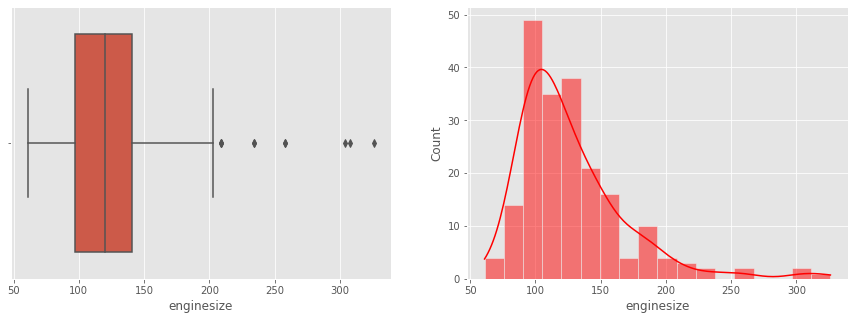

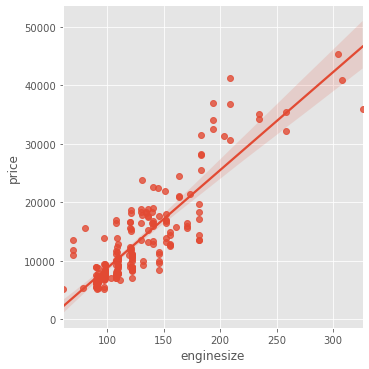

In [39]:
num_price(data, 'enginesize')

Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc)

Kích thước nhiên liệu trung bình các xe là 127, hầu hết nằm trong khoảng 97 đến 141, phân phối có xu hướng lệch phải. Kích thước tăng thì giá cũng tăng.

Theo Kiểm định thì enginesize và price có mối quan hệ tương quan với nhau, nên ảnh hưởng đến giá

count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64
boreratio - Price has p value: 7.907922278249421e-18


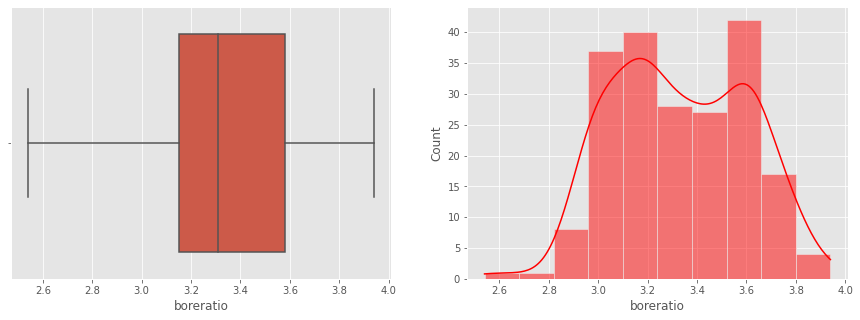

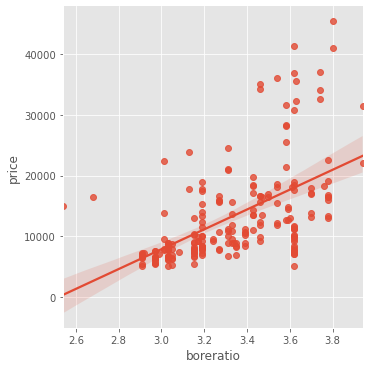

In [40]:
num_price(data, 'boreratio')

The diameter of the cylinder bore is divided by the length of the piston stroke to give the ratio. Đường kích của lỗ xi lanh được chia cho chiều dài của hành trình pít tông để đưa ra tỉ lệ.

boreratio có giá trị trung bình là 3.3, có phân phối chuẩn, boreratio tăng thì giá cũng tăng.

Theo kiểm định thì boreratio và price có mối quan hệ tương quan với nhau, nên ảnh hưởng về giá.

count    205.000000
mean       3.255415
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64
stroke - Price has p value: 0.2575137159091036


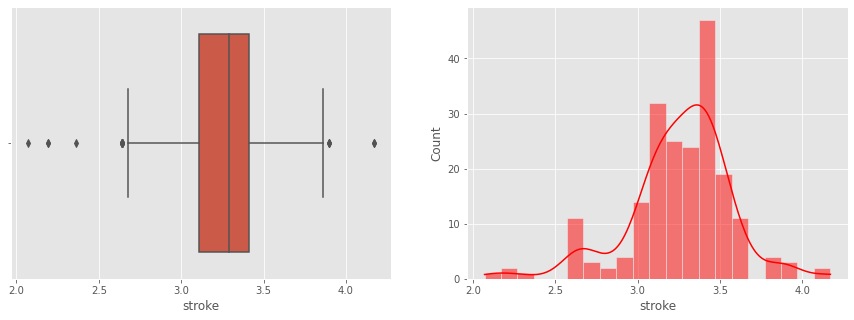

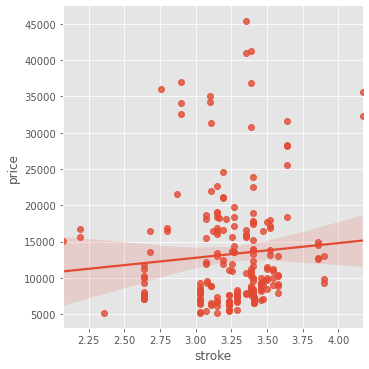

In [41]:
num_price(data, 'stroke')

Stroke in an internal combustion engine refers to the distance a piston moves from bottom dead centre to top dead centre as the crankshaft rotates.

Stroke trong động cơ đốt trong đề cập đến khoảng cách mà pít-tông di chuyển từ điểm chết dưới lên điểm chết trên khi trục khuỷu quay.

Stroke có giá trị trung bình là 3.25, các giá trị hầu hết nằm trong khoảng từ 3.1 đến 3.4, có phân phối chuẩn. Stroke và price phân tán đều.

Theo kiểm định, stroke và price không có mối quan hệ tương quan nên không ảnh hưởng đến giá.

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64
compressionratio - Price has p value: 0.3327723612238307


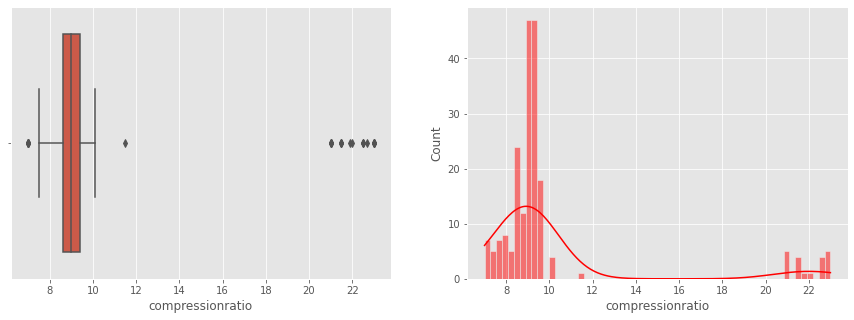

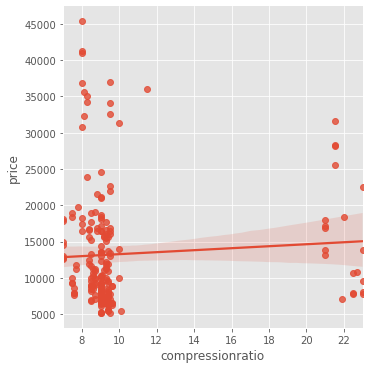

In [42]:
num_price(data, 'compressionratio')

The compression ratio is defined as the ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume).

Tỷ số nén là tỷ số giữa thể tích xilanh và buồng đốt trong động cơ đốt trong tại các giá trị lớn nhất và nhỏ nhất của chúng.

Tỷ số nén có phân bố không đều. Nó tập trung tại các giá trị 8 đến 10.

Theo kiểm định compressionratio và price không có mối quan hệ tương đồng với nhau. Nên không ảnh hưởng đến giá.

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64
horsepower - Price has p value: 1.4834365732940913e-48


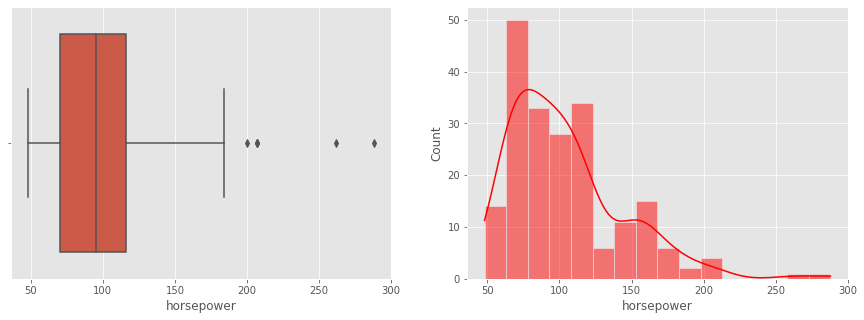

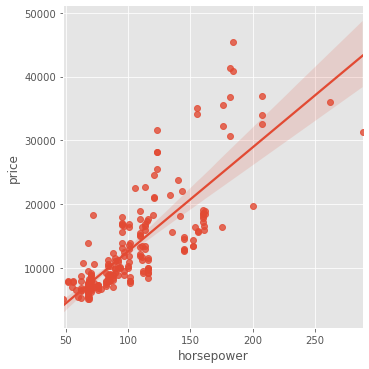

In [43]:
num_price(data, 'horsepower')

Mã lực trung bình của các xe là 104, hầu hết nằm trong khoảng từ 70 đến 116. Có xe đạt giá trị 288 (cao nhất) và thấp nhất là 48. Có phân phối lệch phải. Mã lực tăng thì giá cũng tăng.

Theo kiểm định thì horsepower và price có mối tương quan với nhau, nên sẽ ảnh hưởng đến giá.

count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64
peakrpm - Price has p value: 0.22414123444667824


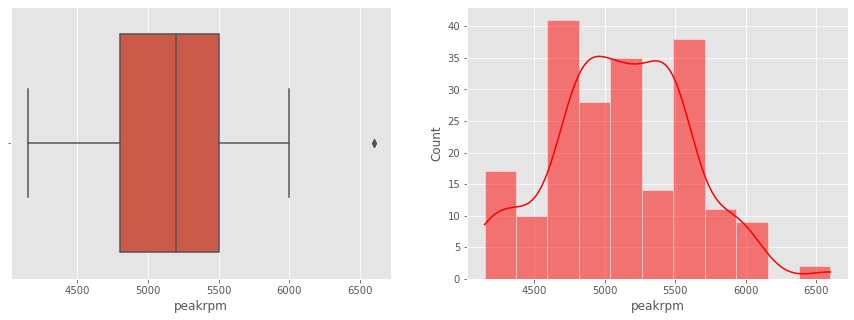

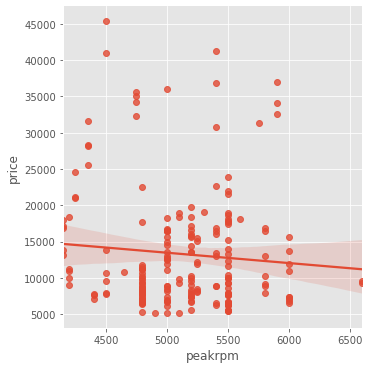

In [44]:
num_price(data, 'peakrpm')

The full form of RPM is Revolutions Per Minute. More RPM means higher speed or power produced by the engine.

Hình thức đầy đủ của RPM là Số vòng quay mỗi phút. Nhiều RPM hơn có nghĩa là tốc độ hoặc công suất cao hơn do động cơ tạo ra

peakrpm có phân bố đều, hầu hết nằm trong khoảng từ 4800 đến 5500.

Theo kiểm định thì peakrpm và price không có mối tương quan với nhau, nên không ảnh hưởng đến giá.

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64
citympg - Price has p value: 7.978684249663976e-30


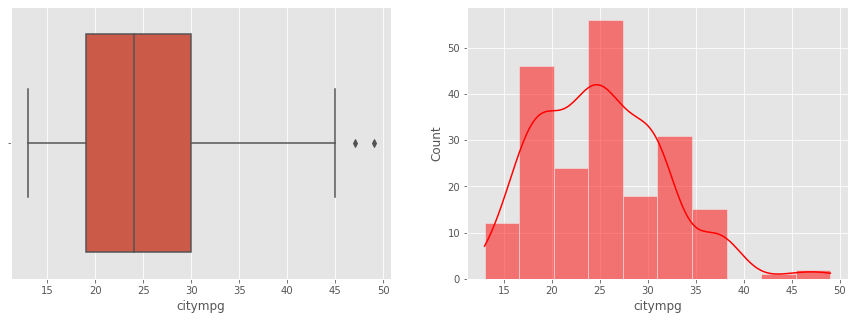

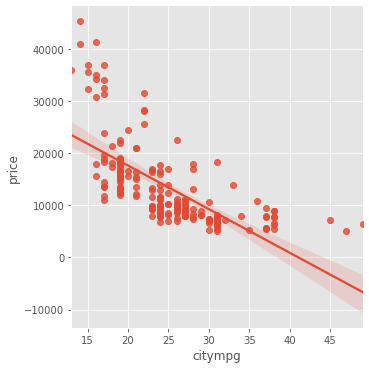

In [45]:
num_price(data, 'citympg')

citympg (miles per gallon): This number is the average MPG for your car in the city.

citympg có giá trị trung bình là 25, hầu hết đều nằm trong khoảng từ 19 đến 30. Có xu hướng lệch phải. Citympg giảm thì giá càng tăng, do tiết kiệm nhiên liệu.

Theo kiểm định citympg và price có mối quan hệ tương quan với nhau, nên ảnh hưởng đến giá

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64
highwaympg - Price has p value: 3.230681380364601e-31


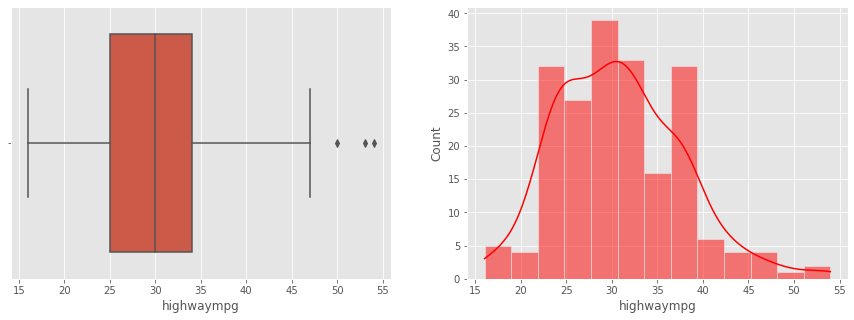

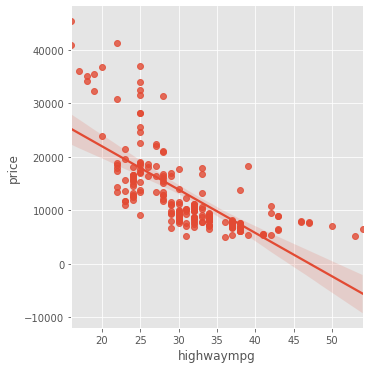

In [46]:
num_price(data, 'highwaympg')

highwaympg (miles per gallon): This number is the average MPG for your car in the highway.

highwaympg có giá trị trung bình là 30, hầu hết đều nằm trong khoảng từ 25 đến 34. Có phân phối chuẩn. highwaympg giảm thì giá càng tăng, do tiết kiệm nhiên liệu.

Theo kiểm định highwaympg và price có mối quan hệ tương quan với nhau, nên ảnh hưởng đến giá.

### Kết luận:
#### Các thuộc tính định lượng ảnh hưởng tới giá:
- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower
- citympg
- highwaympg

## 5.Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)

In [47]:
num_cols = data.select_dtypes(['int64', 'float64']).columns.tolist()
num_cols.remove('car_ID')
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

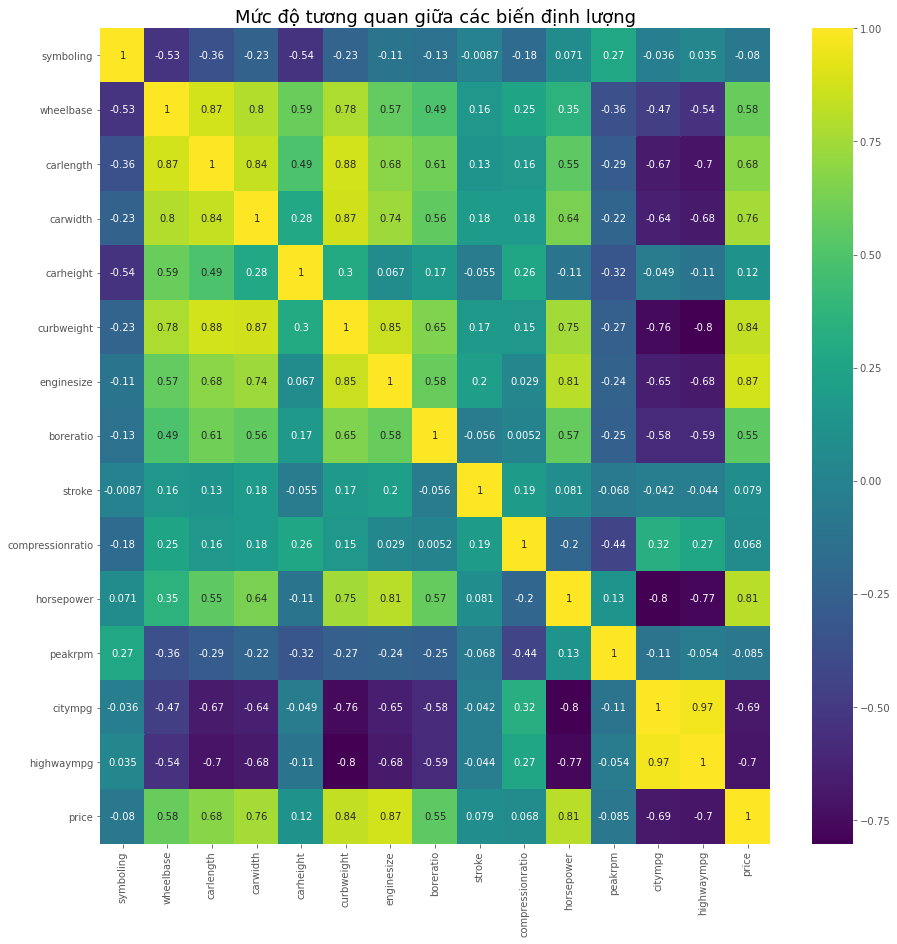

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='viridis')
plt.title("Mức độ tương quan giữa các biến định lượng", fontsize=18);

Nhìn vào Biểu đồ Heatmap, ta nhận thấy các giá trị tương quan vừa và tương quan mạnh đều là các thuộc tính ta đã phân tích và lựa chọn ở trên: `wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg`.

Nhưng ta thấy citympg và highwaympg có mức độ tương quan rất cao với nhau nên ta có thể chọn 1 trong 2 vào mô hình.

## 6. Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu

In [49]:
new_data = data.copy()
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'two'] = 2
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'three'] = 3
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'four'] = 4
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'five'] = 5
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'six'] = 6
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'eight'] = 8
new_data['cylindernumber'].loc[new_data['cylindernumber'] == 'twelve'] = 12
new_data['cylindernumber'] = new_data['cylindernumber'].astype('int16')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
num_features = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 
                'horsepower', 'highwaympg', 'price']
cat_features = ['aspiration', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem']

In [51]:
new_data = pd.concat([new_data[num_features], new_data[cat_features]], axis=1)
new_data.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,price,aspiration,carbody,drivewheel,enginetype,fuelsystem
0,88.6,168.8,64.1,2548,130,3.47,111,27,13495.0,std,convertible,rwd,dohc,mpfi
1,88.6,168.8,64.1,2548,130,3.47,111,27,16500.0,std,convertible,rwd,dohc,mpfi
2,94.5,171.2,65.5,2823,152,2.68,154,26,16500.0,std,hatchback,rwd,ohcv,mpfi
3,99.8,176.6,66.2,2337,109,3.19,102,30,13950.0,std,sedan,fwd,ohc,mpfi
4,99.4,176.6,66.4,2824,136,3.19,115,22,17450.0,std,sedan,4wd,ohc,mpfi


In [52]:
new_data = pd.get_dummies(new_data)
new_data.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,price,aspiration_std,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,27,13495.0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,27,16500.0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,26,16500.0,1,...,1,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,30,13950.0,1,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,22,17450.0,1,...,0,0,0,0,0,0,0,1,0,0


In [53]:
Q1 = new_data['price'].quantile(0.25)
Q3 = new_data['price'].quantile(0.75)
IQR = Q3 - Q1

new_data = new_data[(new_data['price'] > (Q1 - 1.5*IQR)) & (new_data['price'] < (Q3 + 1.5*IQR))]
new_data

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,price,aspiration_std,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,27,13495.0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,27,16500.0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,26,16500.0,1,...,1,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,30,13950.0,1,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,22,17450.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,28,16845.0,1,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,25,19045.0,0,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,23,21485.0,1,...,1,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,27,22470.0,0,...,0,0,0,0,0,1,0,0,0,0


## 7. Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất.
## 8.Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.
## 9.Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS
## 10.Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

In [54]:
X = new_data.drop('price', axis=1)
y = new_data['price']

In [55]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)
X = pd.DataFrame(x_sc, columns=X.columns)

In [56]:
x_sm = sm.add_constant(X)
model = sm.OLS(y.values, x_sm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     35.00
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           3.99e-54
Time:                        19:09:44   Log-Likelihood:                -1703.6
No. Observations:                 190   AIC:                             3463.
Df Residuals:                     162   BIC:                             3554.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.151e+04    148.938     77.277      0.000    1.12e+04    1.18e+04
wheelbase             386.8138    415.288      0.931      0.353    -433.262    1206.890
carlength            -957.4179    505.240     -1.895      0.060   -1955.123      40.287
carwidth             1274.1342    360.023      3.539      0.001     563.190    1985.078
curbweight           2647.8835    765.149      3.461      0.001    1136.932    4158.835
enginesize            502.6731    523.290      0.961      0.338    -530.677    1536.023
boreratio            -736.1703    274.397     -2.683      0.008   -1278.026    -194.314
horsepower            965.9892    614.234      1.573      0.118    -246.949    2178.927
highwaympg             38.5176    378.485      0.102      0.919    -708.883     785.919
aspiration_std       -208.7500    152.997     -1.364      0.174    -510.875      93.375
aspiration_turbo      208.7500    152.997      1.364      0.174     -93.375     510.875
carbody_convertible   401.3734    175.842      2.283      0.024      54.136     748.611
carbody_hardtop      -215.1694    153.397     -1.403      0.163    -518.086      87.747
carbody_hatchback    -200.6604    126.702     -1.584      0.115    -450.860      49.539
carbody_sedan         291.1675    106.704      2.729      0.007      80.458     501.877
carbody_wagon        -212.2441    156.898     -1.353      0.178    -522.073      97.584
drivewheel_4wd       -250.5764    183.098     -1.369      0.173    -612.144     110.991
drivewheel_fwd       -411.7088    133.600     -3.082      0.002    -675.530    -147.887
drivewheel_rwd        539.3825    146.594      3.679      0.000     249.901     828.864
enginetype_dohc      -151.9767    180.727     -0.841      0.402    -508.862     204.909
enginetype_dohcv    -1.621e-13   2.24e-13     -0.723      0.471   -6.05e-13    2.81e-13
enginetype_l         -577.3450    198.674     -2.906      0.004    -969.669    -185.021
enginetype_ohc        324.9451    117.402      2.768      0.006      93.110     556.780
enginetype_ohcf       246.3623    197.648      1.246      0.214    -143.936     636.660
enginetype_ohcv      -414.2755    209.627     -1.976      0.050    -828.230      -0.322
enginetype_rotor      407.1635    336.463      1.210      0.228    -257.255    1071.582
fuelsystem_1bbl       -58.4897    157.480     -0.371      0.711    -369.468     252.489
fuelsystem_2bbl        14.3325    144.029      0.100      0.921    -270.083     298.748
fuelsystem_4bbl      -129.8653    295.346     -0.440      0.661    -713.090     453.360
fuelsystem_idi         93.3066    278.116      0.335      0.738    -455.894     642.508
fuelsystem_mfi       -154.2225    158.609     -0.972      0.332    -467.430     158.985
fuelsystem_mpfi       235.2724    179.505      1.311      0.192    -119.200     589.744
fue

Mặc dù R2 và adjusted-R2 cao hơn 80%, nhưng mô hình còn một số đặc trưng chưa phù hợp nên ta chọn các đặc trưng khác để xây dựng mô hình mới.

Các đặc trưng chọn lại:
`'carwidth', 'curbweight', 'boreratio', 'carbody_convertible', 'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'fuelsystem_spdi'`

In [57]:
X = new_data[['carwidth', 'curbweight', 'boreratio', 'carbody_convertible', 'carbody_sedan', 
              'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 
              'fuelsystem_spdi']]
y = new_data['price']

In [58]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)
X = pd.DataFrame(x_sc, columns=X.columns)

In [59]:
x_sm = sm.add_constant(X)
model = sm.OLS(y.values, x_sm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     82.48
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.32e-61
Time:                        19:09:44   Log-Likelihood:                -1722.4
No. Observations:                 190   AIC:                             3467.
Df Residuals:                     179   BIC:                             3502.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.151e+04    156.407     73.586      0.000    1.12e+04    1.18e+04
carwidth             1614.4077    317.218      5.089      0.000     988.439    2240.377
curbweight           2782.1296    376.737      7.385      0.000    2038.712    3525.547
boreratio            -578.3586    210.890     -2.742      0.007    -994.509    -162.208
carbody_convertible   454.4661    163.609      2.778      0.006     131.615     777.317
carbody_sedan         476.3604    161.716      2.946      0.004     157.246     795.475
drivewheel_fwd        -89.4110    393.960     -0.227      0.821    -866.814     687.992
drivewheel_rwd       1131.6224    375.106      3.017      0.003     391.423    1871.822
enginetype_l         -887.6818    185.974     -4.773      0.000   -1254.666    -520.698
enginetype_ohc         75.4665    194.399      0.388      0.698    -308.142     459.075
fuelsystem_spdi       -36.9153    164.138     -0.225      0.822    -360.810     286.980
==============================================================================
Omnibus:                       35.227   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.850
Skew:                           0.964   Prob(JB):                     1.66e-13
Kurtosis:                       4.927   Cond. No.                         6.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lần này ta thấy, R2 và Adjusted-R2 đã giảm hơn so với mô hình trước nhưng vẫn cao hơn 80%, có 3 đặc trưng vẫn chưa phù hợp trong mô hình này nên ta tiếp tục loại bỏ.

Các đặc trưng chọn lại: `'carwidth', 'curbweight', 'boreratio', 'carbody_convertible', 'carbody_sedan', 'drivewheel_rwd', 'enginetype_l'`

In [60]:
X = new_data[['carwidth', 'curbweight', 'boreratio', 'carbody_convertible', 'carbody_sedan', 
              'drivewheel_rwd', 'enginetype_l']]
y = new_data['price']

In [61]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)
X = pd.DataFrame(x_sc, columns=X.columns)

In [62]:
x_sm = sm.add_constant(X)
model = sm.OLS(y.values, x_sm)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.24e-64
Time:                        19:09:44   Log-Likelihood:                -1722.5
No. Observations:                 190   AIC:                             3461.
Df Residuals:                     182   BIC:                             3487.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.151e+04    155.207     74.155      0.000    1.12e+04    1.18e+04
carwidth             1621.6871    298.738      5.428      0.000    1032.252    2211.122
curbweight           2775.9282    349.137      7.951      0.000    2087.052    3464.804
boreratio            -590.3247    204.160     -2.891      0.004    -993.150    -187.499
carbody_convertible   451.0522    161.495      2.793      0.006     132.408     769.696
carbody_sedan         484.5771    158.610      3.055      0.003     171.626     797.528
drivewheel_rwd       1206.5908    211.131      5.715      0.000     790.011    1623.171
enginetype_l         -916.6496    168.450     -5.442      0.000   -1249.015    -584.284
==============================================================================
Omnibus:                       35.812   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.415
Skew:                           0.983   Prob(JB):                     1.25e-13
Kurtosis:                       4.907   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lần này mô hình đã ổn định, và ta sẽ lấy các đặc trưng này để xây dựng mô hình hồi quy tuyến tính

In [63]:
X.head()

,carwidth,curbweight,boreratio,carbody_convertible,carbody_sedan,drivewheel_rwd,enginetype_l
0,-0.834337,0.152836,0.637673,6.819091,-0.919054,1.454219,-0.259645
1,-0.834337,0.152836,0.637673,6.819091,-0.919054,1.454219,-0.259645
2,-0.073509,0.771208,-2.389360,-0.146647,-0.919054,1.454219,-0.259645
3,0.306906,-0.321625,-0.435199,-0.146647,1.088075,-0.687654,-0.259645
4,0.415595,0.773457,-0.435199,-0.146647,1.088075,-0.687654,-0.259645


In [64]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
linear = LinearRegression()
linear.fit(x_train, y_train)

print("Coefficients: ", linear.coef_)
print("Intercept: ", linear.intercept_)

y_pred = linear.predict(x_test)

print("R2-score: ", r2_score(y_test, y_pred))
print("Tổng bình phương sai số trung bình: ", mean_squared_error(y_test, y_pred))

Coefficients:  [1645.39977768 2519.13344088 -461.77683391  439.37535313  482.24978443
 1279.65328159 -900.88676017]
Intercept:  11530.96746425032
R2-score:  0.8775280232877637
Tổng bình phương sai số trung bình:  3441832.5052971123


## Ta xây dựng được mô hình hồi quy tuyến tính như sau: 
$$ Price = 11530.96746425032 + 1645.39977768 * carwidth + 2519.13344088 * curbweight - 461.77683391 * boreratio + 439.37535313 * carbody_convertible + 482.24978443 * carbody_sedan + 1279.65328159 * drivewheel_rwd - 900.88676017 * enginetype_l$$

Mô hình có R2 cao, nó cho thấy mô hình giải thích được 87,8% của các biến độc lập. 

Tổng bình phương sai số trung bình thấp cho thấy mô hình có thể dự đoán được gần đúng giá của các loại xe dựa vào các biến độc lập trên.